# Úkoly 
1. vykreslete grafy prvních 5 Legendrových polynomů na intervalu [-1,1]

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp

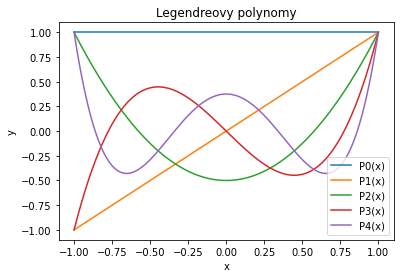

In [2]:
x = np.linspace(-1, 1, 1000)
n = 5

for i in range(n):
    P = sp.special.legendre(i)
    plt.plot(x, P(x), label=f'P{i}(x)')

plt.legend()
plt.title('Legendreovy polynomy')
plt.xlabel('x')
plt.ylabel('y')
plt.show()


2. Vyrobte sparse matici o rozměrech $n^2\times n^2$. Tato matice reprezentuje pravidelnou čtvercovou síť o velikosti $n \times n$. Každá buňka této čtvercové sítě odpovídá jednomu řádku/sloupci matice, přičemž pořadí buněk čtvrtcové sítě berte po řádcích (viz obrázek níže). Hodnoty v matici budou řízeny jedním parametrem $\varepsilon$, pro jednoduchost si místo něj představte $0.1$.
Nenulové hodnoty v matici jsou zadány sousedností buněk a to následovně:
    - hodnoty na diagonále (tedy sousednost prvku se sebou samým) jsou $1 + k \cdot \varepsilon$ (kde $k$ určuje počet sousedních buněk = 4 uvnitř, 3 na hranách, 2 v rozích)
    - mimodiagonální prvky mají hodnotu $-\varepsilon$, právě tehdy pokud index řádku a index sloupce mimodiagonálního prvku odpovídá sousedním buňkám ve čtvercové síti viz obrázek.

Ukázka jak přechází mřížka do matice pro $n=4$ a $\varepsilon = 0.1$ na následujícím obrázku:
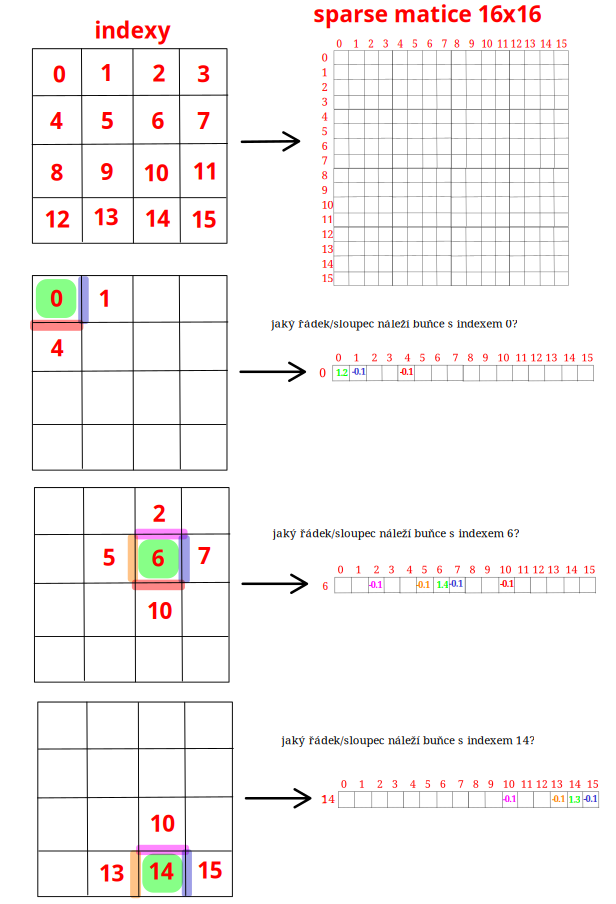


Sestavte matici pomocí formátu LIL a vyplňte hodnoty pomocí cyklu přes všechny buňky čtvercové sítě. Vznikne matice s následujícími vlastnostmi:
- velikost $n^2 \times n^2$
- $\varepsilon$ je parametr, který můžete nastavit, například $\varepsilon = 0.1$
- matice je symetrická, tj. $A = A^T$
- každý řádek/sloupec má maximálně 5 nenulových prvků
    - 5, pokud se jedná o buňku unvitř sítě
    - 4, pokud se jedná o buňku na okraji sítě
    - 3, pokud se jedná o buňku v rohu sítě
- výsledná matice je 5-ti diagonální (hlavní diagonála, dvě vedleší těsně pod a nad hlavní diagonálou, dvě vedleší diagonály ve vzdálenosti $\pm n$ od hlavní diagonály)

Pro $n=3$ a $\varepsilon = 0.1$ by měla matice (v plné formě) měla vypadat následovně:
```python
[[ 1.2 -0.1  0.  -0.1  0.   0.   0.   0.   0. ]
 [-0.1  1.3 -0.1  0.  -0.1  0.   0.   0.   0. ]
 [ 0.  -0.1  1.2  0.   0.  -0.1  0.   0.   0. ]
 [-0.1  0.   0.   1.3 -0.1  0.  -0.1  0.   0. ]
 [ 0.  -0.1  0.  -0.1  1.4 -0.1  0.  -0.1  0. ]
 [ 0.   0.  -0.1  0.  -0.1  1.3  0.   0.  -0.1]
 [ 0.   0.   0.  -0.1  0.   0.   1.2 -0.1  0. ]
 [ 0.   0.   0.   0.  -0.1  0.  -0.1  1.3 -0.1]
 [ 0.   0.   0.   0.   0.  -0.1  0.  -0.1  1.2]]
 ```


In [3]:
import scipy.sparse as sparse
n = 3
epsilon = 1e-1
A = sparse.lil_matrix((n*n, n*n))

indices=np.zeros((n,n))

#pruchod matici indexu
for i in range(n): #radek
    for j in range(n): #sloupec

        cur_val = i*n + j #hodnota aktualni bunky v matici indexu

        # nastaveni diagonalniho prvku v matici A
        num_adjacent = 4
        if i == 0 or i == n-1:
            num_adjacent -= 1
        if j == 0 or j == n-1:
            num_adjacent -= 1
        diag_val = 1 + num_adjacent * epsilon
        A[cur_val, cur_val] = diag_val

        #horni hrana
        if i>0:
            A[cur_val, cur_val-n] = -epsilon
        #dolni hrana
        if i<n-1:
            A[cur_val, cur_val+n] = -epsilon
        #leva hrana
        if j>0:
            A[cur_val, cur_val-1] = -epsilon
        #prabva hrana
        if j<n-1:
            A[cur_val, cur_val+1] = -epsilon

print(A.todense())

[[ 1.2 -0.1  0.  -0.1  0.   0.   0.   0.   0. ]
 [-0.1  1.3 -0.1  0.  -0.1  0.   0.   0.   0. ]
 [ 0.  -0.1  1.2  0.   0.  -0.1  0.   0.   0. ]
 [-0.1  0.   0.   1.3 -0.1  0.  -0.1  0.   0. ]
 [ 0.  -0.1  0.  -0.1  1.4 -0.1  0.  -0.1  0. ]
 [ 0.   0.  -0.1  0.  -0.1  1.3  0.   0.  -0.1]
 [ 0.   0.   0.  -0.1  0.   0.   1.2 -0.1  0. ]
 [ 0.   0.   0.   0.  -0.1  0.  -0.1  1.3 -0.1]
 [ 0.   0.   0.   0.   0.  -0.1  0.  -0.1  1.2]]


3. sestavte matici $A$ z předchozího úkolu bez použití cyklů. Sestavte nejprve vektory indexů řádků, sloupců a hodnot pro všechny nenulové prvky matice. Poté sestavte sparse matici ve formátu CSR najednou z těchto tří polí. Hint, jak na to: 
    - Sestavte tři pole: `row`, `col` a `data`, které obsahují řádky, sloupce a hodnoty nenulových prvků matice 
        - separátně sestavte příspěvky které vzniknou konektivitou na vnitřních horizontálních hranách a na vnitřních vertikálních hranách.
            - při procházení všech vnitřních horizontálních hran si rozmyslete jaké jsou vždy indexy nad a pod hranou (toto jsou souřadnice řádků a sloupců nenulových prvků)
            - totéž pro vnitřní vertikální hrany zde se může hodit `np.arange(n * n).reshape((n, n)).T.flatten()` což vytvoří vektor s přeházenými indexy (tedy indexy buněk uspořádané po sloupcích)
        - zvlášť sestavte příspevky pro mimodiagonální prvky a diagonální prvky.
            - u diagonálních prvků, nejprve vyrobte vektor hodnot $1+ 4\cdot \varepsilon$ a pak pro každou hranu odečtěte $\varepsilon$.
    - Tyto pole vytvořte vektorizovaně - bez cyklů

In [68]:
# create matrix A using vectorized operations, creating indices for rows and columns and data
# use sparse.csr_matrix((data, (i, j)))
import numpy as np
from scipy.sparse import csr_matrix

n = 3
epsilon = 0.1

def A_efficiently(n, epsilon):
    ## --- Mimodiagonální prvky
    # Vnitřní horizontální hrany
    horizontal_up_idx = np.arange(n,n*n)
    horizontal_low_idx = np.arange(0,n*n-n)
    row_horizontal = np.append(horizontal_up_idx,horizontal_low_idx)
    col_horizontal = np.append(horizontal_low_idx,horizontal_up_idx) 
    data_horizontal = -epsilon * np.ones(2 * (n * n - n)) # data jsou vždy stejná


    # Vnitřní vertikální hrany
    index_matrix_vertical = np.arange(n * n).reshape((n, n)).T.flatten() # indexy buněk přeházené pro vertikální hranu
    vertical_left_idx = index_matrix_vertical[0:n*n-n]
    vertical_right_idx = index_matrix_vertical[n:n*n]
    row_vertical = np.append(vertical_left_idx, vertical_right_idx)
    col_vertical = np.append(vertical_right_idx, vertical_left_idx)
    data_vertical = -epsilon * np.ones(2 * (n * n - n)) # data jsou vždy stejná

    ## --- Diagonála (všechny prvky)
    diagonal_idx = np.arange(n * n)
    row_idx_diag = diagonal_idx
    col_idx_diag = diagonal_idx
    data_diag = (1 + 4 * epsilon) * np.ones(n * n)

    # odečteme epsilon pro každou z hran
    # horní hrana
    data_diag = data_diag - np.append(np.ones(n)*epsilon,np.zeros(n*n-n))
    # dolní hrana
    data_diag = data_diag - np.append(np.zeros(n*n-n),np.ones(n)*epsilon)
    # levá hrana
    data_diag = data_diag - np.append(np.ones(n),np.zeros((n-1)*n)).reshape((n,n)).T.flatten()*epsilon
    # pravá hrana
    data_diag = data_diag - np.flip(np.append(np.ones(n),np.zeros((n-1)*n)).reshape((n,n)).T.flatten()*epsilon)

    ## --- spojení všech vektorů a sestavení matice
    # spojíme všechny vnitřní hrany a diagonálu
    row = np.hstack((row_idx_diag, row_horizontal, row_vertical))
    col = np.hstack((col_idx_diag, col_horizontal, col_vertical))
    data = np.hstack((data_diag, data_horizontal, data_vertical))

    # vyrobíme matici
    A_efficiently = csr_matrix((data, (row, col)))

    return A_efficiently

print(A_efficiently(n, epsilon).todense())


[[ 1.2 -0.1  0.  -0.1  0.   0.   0.   0.   0. ]
 [-0.1  1.3 -0.1  0.  -0.1  0.   0.   0.   0. ]
 [ 0.  -0.1  1.2  0.   0.  -0.1  0.   0.   0. ]
 [-0.1  0.   0.   1.3 -0.1  0.  -0.1  0.   0. ]
 [ 0.  -0.1  0.  -0.1  1.4 -0.1  0.  -0.1  0. ]
 [ 0.   0.  -0.1  0.  -0.1  1.3  0.   0.  -0.1]
 [ 0.   0.   0.  -0.1  0.   0.   1.2 -0.1  0. ]
 [ 0.   0.   0.   0.  -0.1  0.  -0.1  1.3 -0.1]
 [ 0.   0.   0.   0.   0.  -0.1  0.  -0.1  1.2]]


In [65]:
n=4
print(np.arange(n * n).reshape((n, n))[:,1:n].T.flatten())
print(np.arange(n * n).reshape((n, n)).T.flatten()[n:n*n])

[ 1  5  9 13  2  6 10 14  3  7 11 15]
[ 1  5  9 13  2  6 10 14  3  7 11 15]


4. Použijte matici $A$ z předchozích úkolů. Vytvořte (použijte níže vytvořený) vektor $b$ odpovídající čtvercové síti s nulami všude kromě malého čtverce uprostřed ($n/6$ okolo středu) s hodnotou 1. 
    - Vykreslete řešení $x$ systému $A \cdot x = b$ jako obrázek čtvercové sítě
    - Spočtěte a vizualizujte 3 vlastní vektory matice $A$ (vlastní vektory odpovídající největším vlastním hodnotám) - opět jako obrázek čtvercové sítě

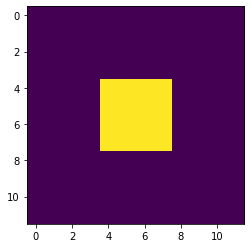

In [39]:
import matplotlib.pyplot as plt

n = 12
epsilon = 2e-1
A = A_efficiently(n, epsilon)

b = np.zeros((n, n))
b[n//2 - n//6:n//2 + n//6,n//2 - n//6:n//2 + n//6] = 1
b = b.flatten()
plt.imshow(b.reshape((n, n)))

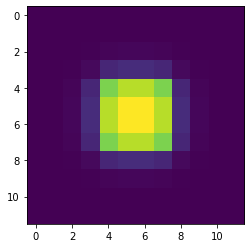

In [40]:
import scipy.sparse.linalg as lg
x = lg.spsolve(A, b)

plt.imshow(x.reshape((n, n)))


(144, 3)


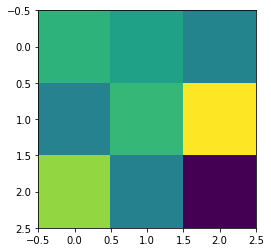

In [46]:
import numpy as np
from scipy.sparse.linalg import eigs

n = 12
epsilon = 2e-1
A = A_efficiently(n, epsilon)

ev1, ev2 = eigs(A, k=3, which='LR')
#print(ev1)
print(ev2.shape)
plt.imshow(ev2[0:3,:].real)

5. Nalezněte všechny kořeny Legendrova polynomu stupně 5 na intervalu $<-1,1>$

In [ ]:
import numpy as np
from numpy.polynomial import legendre

P = legendre.Legendre([0, 0, 0, 0, 0, 1])
roots = P.roots()
roots = [x for x in roots if x>=-1 and x<=1]
print("Kořeny Legendreova polynomu stupně 5 na intervalu [-1, 1]:")
print(roots)

Kořeny Legendreova polynomu stupně 5 na intervalu [-1, 1]:
[-0.9061798459386647, -0.5384693101056832, -3.6092297371070075e-17, 0.5384693101056833, 0.9061798459386647]


6. Pomocí SymPy nalezněte všechny kořeny Legendrova polynomu stupně 5. Použíjte `sympy.legendre()` pro vytvoření výrazu odpovídajícímu Legendrovu polynomu.
- porovnejte výsledky s předchozím úkolem

In [ ]:
import sympy as sp

x = sp.Symbol('x')
legendre_5 = sp.legendre(5, x)
legendre_5

roots2 = sp.solve(legendre_5, x)
roots2 = [sp.N(x) for x in roots2 if x>=-1 and x<=1]
roots2.sort()

print("Kořeny Legendreova polynomu stupně 5:")
print(roots2)

Kořeny Legendreova polynomu stupně 5:
[-0.906179845938664, -0.538469310105683, 0, 0.538469310105683, 0.906179845938664]


In [ ]:
for i in range(5):
    print(roots[i]-roots2[i])

-7.77156117237610e-16
-1.11022302462516e-16
-3.60922973710701e-17
2.22044604925031e-16
7.77156117237610e-16
